<br>
<h1 style = "font-size:50px; font-family:Helvetica ; font-weight : normal; color : #fe346e; text-align: center;"> Exploratory Data Analysis</h1>
<h2 style = "font-size:40px; font-family:Helvetica ; font-weight : normal; text-align: center;"> Clustering </h2>
<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612126/EDA/dw1xwbh1g2c85izletjs.png' width="200"  style="float:center" align="center"/>

<br>

<div style='padding:15px'>
<a href="https://colab.research.google.com/github/rribeiro-sci/EDA_laboratory/blob/main/4-Clustering.ipynb" target="_blank">
<img alt="Colab" src="https://res.cloudinary.com/djz27k5hg/image/upload/v1637335713/badges/colab-badge_hh0uyl.svg" height="25" style="margin:20px">
</a>

</div> 


**Clustering** is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. 

Clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance.

In [1]:
# Importing libraries
from sklearn import datasets
import numpy as np

# importing iris dataset
iris = datasets.load_iris()

# loading iris dataset into a dataframe
species = np.array([iris.target_names[val] for val in iris.target])


## K-Means

K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain number (thats the " K") of distinct groupings. K-means finds observations that share important characteristics and classifies them together into clusters.
<br>
<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612125/EDA/n6d4tc4qgsucpxcgbl3p.gif' width="600" style="float:center" />

<br>



In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km_data = km.fit_transform(X)

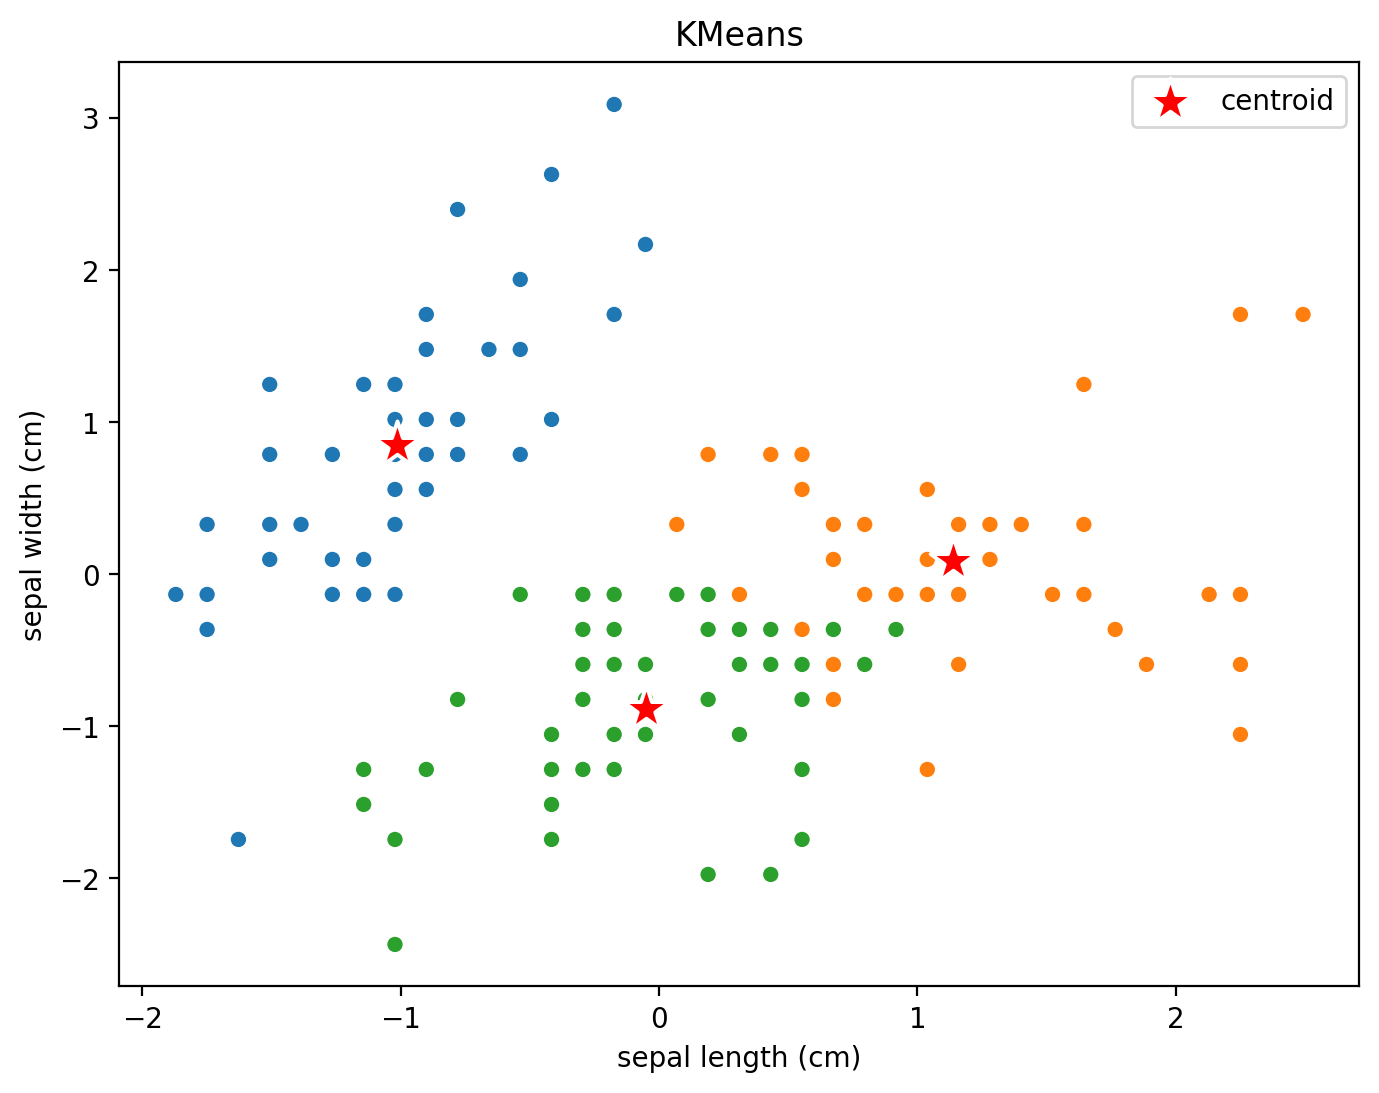

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

km_labels = np.array([iris.target_names[val] for val in km.labels_])
fig, ax = plt.subplots(1,1 ,figsize=[8,6])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=km_labels, palette='tab10', ax=ax, legend=False)
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], color='red',marker='*', s=300, label='centroid')

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title('No clustering')
ax.set_title('KMeans')
plt.show()

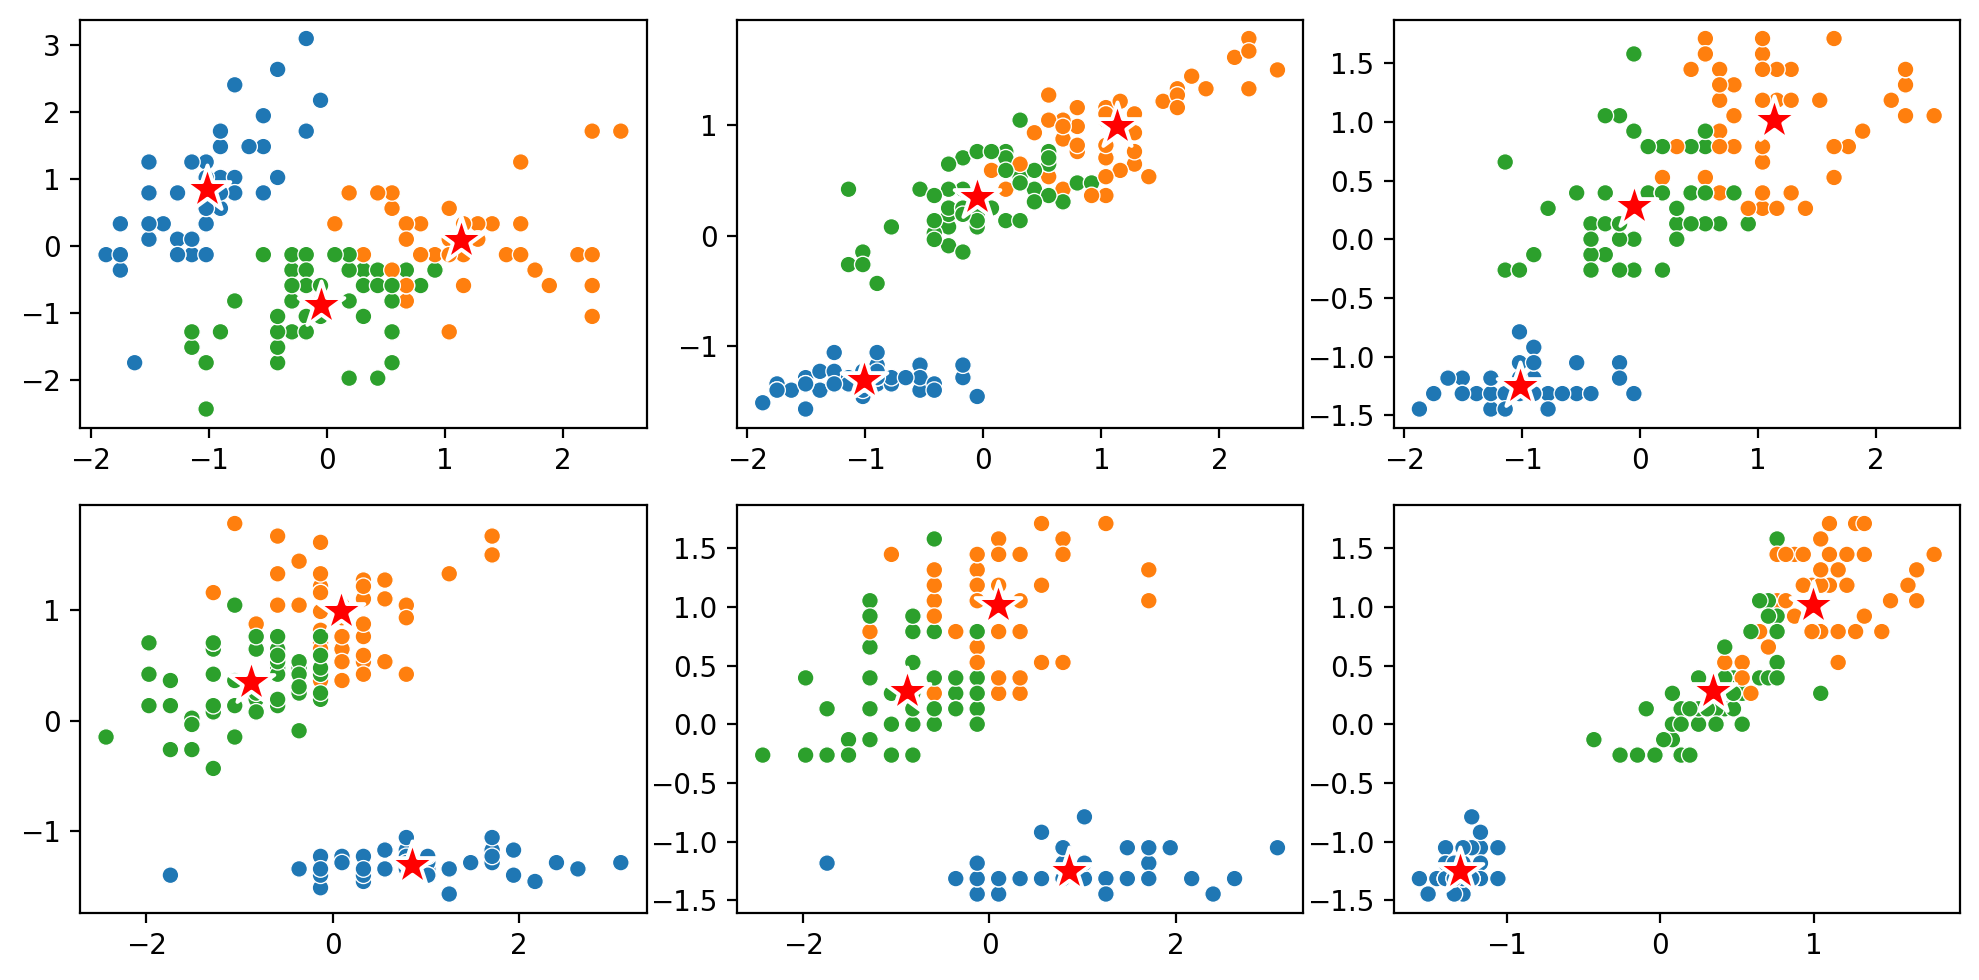

In [5]:
km_labels = np.array([iris.target_names[val] for val in km.labels_])

fig, ax = plt.subplots(2,3, figsize=[10,5])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=km_labels, palette='tab10', ax=ax[0][0], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], color='red',marker='*', s=300,ax=ax[0][0])

sns.scatterplot(x=X[:,0], y=X[:,2], hue=km_labels, palette='tab10', ax=ax[0][1], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,2], color='red',marker='*', s=300,ax=ax[0][1])

sns.scatterplot(x=X[:,0], y=X[:,3], hue=km_labels, palette='tab10', ax=ax[0][2], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,3], color='red',marker='*', s=300,ax=ax[0][2])

sns.scatterplot(x=X[:,1], y=X[:,2], hue=km_labels, palette='tab10', ax=ax[1][0], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,1], y=km.cluster_centers_[:,2], color='red',marker='*', s=300,ax=ax[1][0])

sns.scatterplot(x=X[:,1], y=X[:,3], hue=km_labels, palette='tab10', ax=ax[1][1], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,1], y=km.cluster_centers_[:,3], color='red',marker='*', s=300,ax=ax[1][1])

sns.scatterplot(x=X[:,2], y=X[:,3], hue=km_labels, palette='tab10', ax=ax[1][2], legend=False)
sns.scatterplot(x=km.cluster_centers_[:,2], y=km.cluster_centers_[:,3], color='red',marker='*', s=300,ax=ax[1][2])

plt.tight_layout()
plt.show()

### How many clusters would we need?

There is no perfect solution to choosing k but one popular heuristic is known as the _elbow approach_. This involves applying k-means for a range of values of k and plotting the choice of k against the _total sum of squared distances (SSD).

* **SSD will always decrease with the increase of the number of clusters**
* **we are looking to find the point when adding more clusters no longer provides a significant decrease in in SSD (longer improves our overall solution)** 


<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612126/EDA/vs6hgvuqydpqbj2txcnq.gif' width="700" style="float:center" />


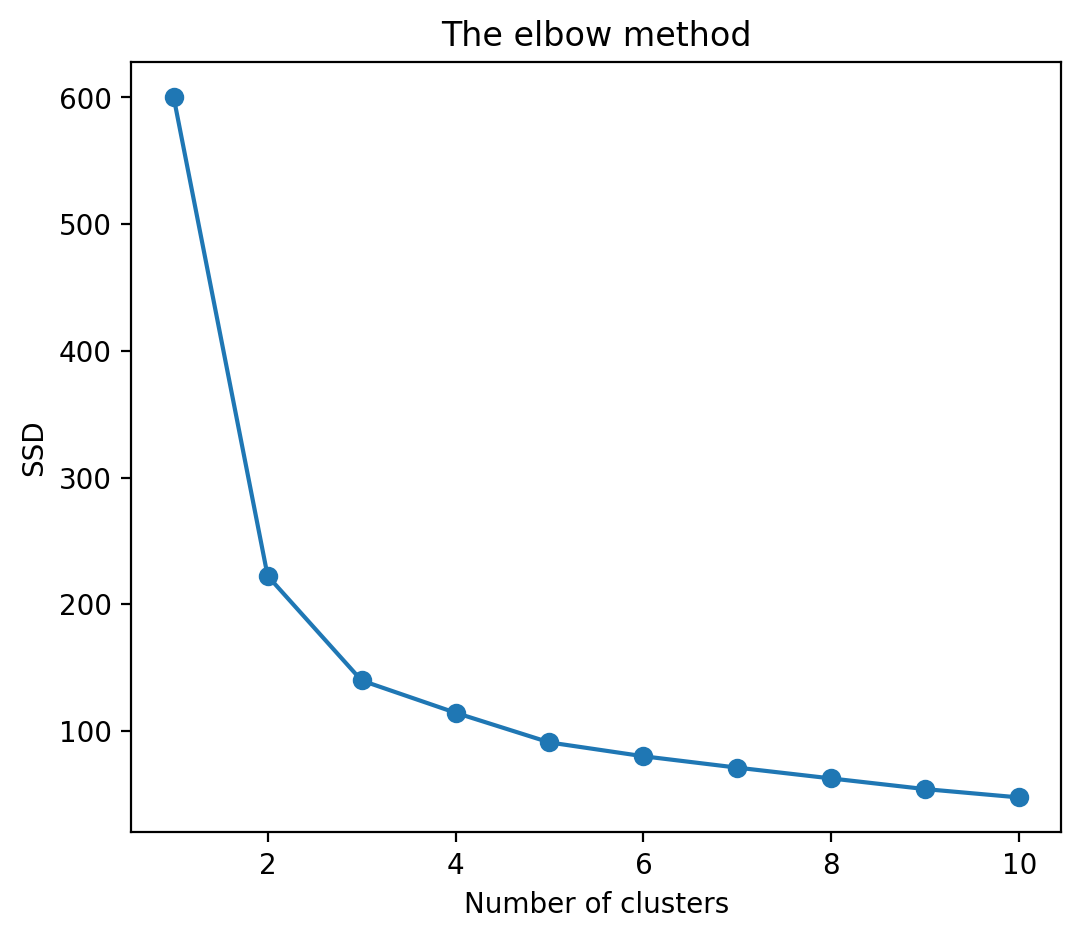

In [6]:
# in sci-kit learn the sum of squared distances is called Inertia
ssd = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(6,5))
plt.scatter(range(1,11), ssd)
plt.plot(range(1,11), ssd)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

## Combining PCA and K-means Clustering

* Reducing the number of features improves the performance of the algorithm. 
* By decreasing the number of features the noise is also reduced.

In [7]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X)

In [8]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
pca_kmeans = kmeans.fit(pca_data)

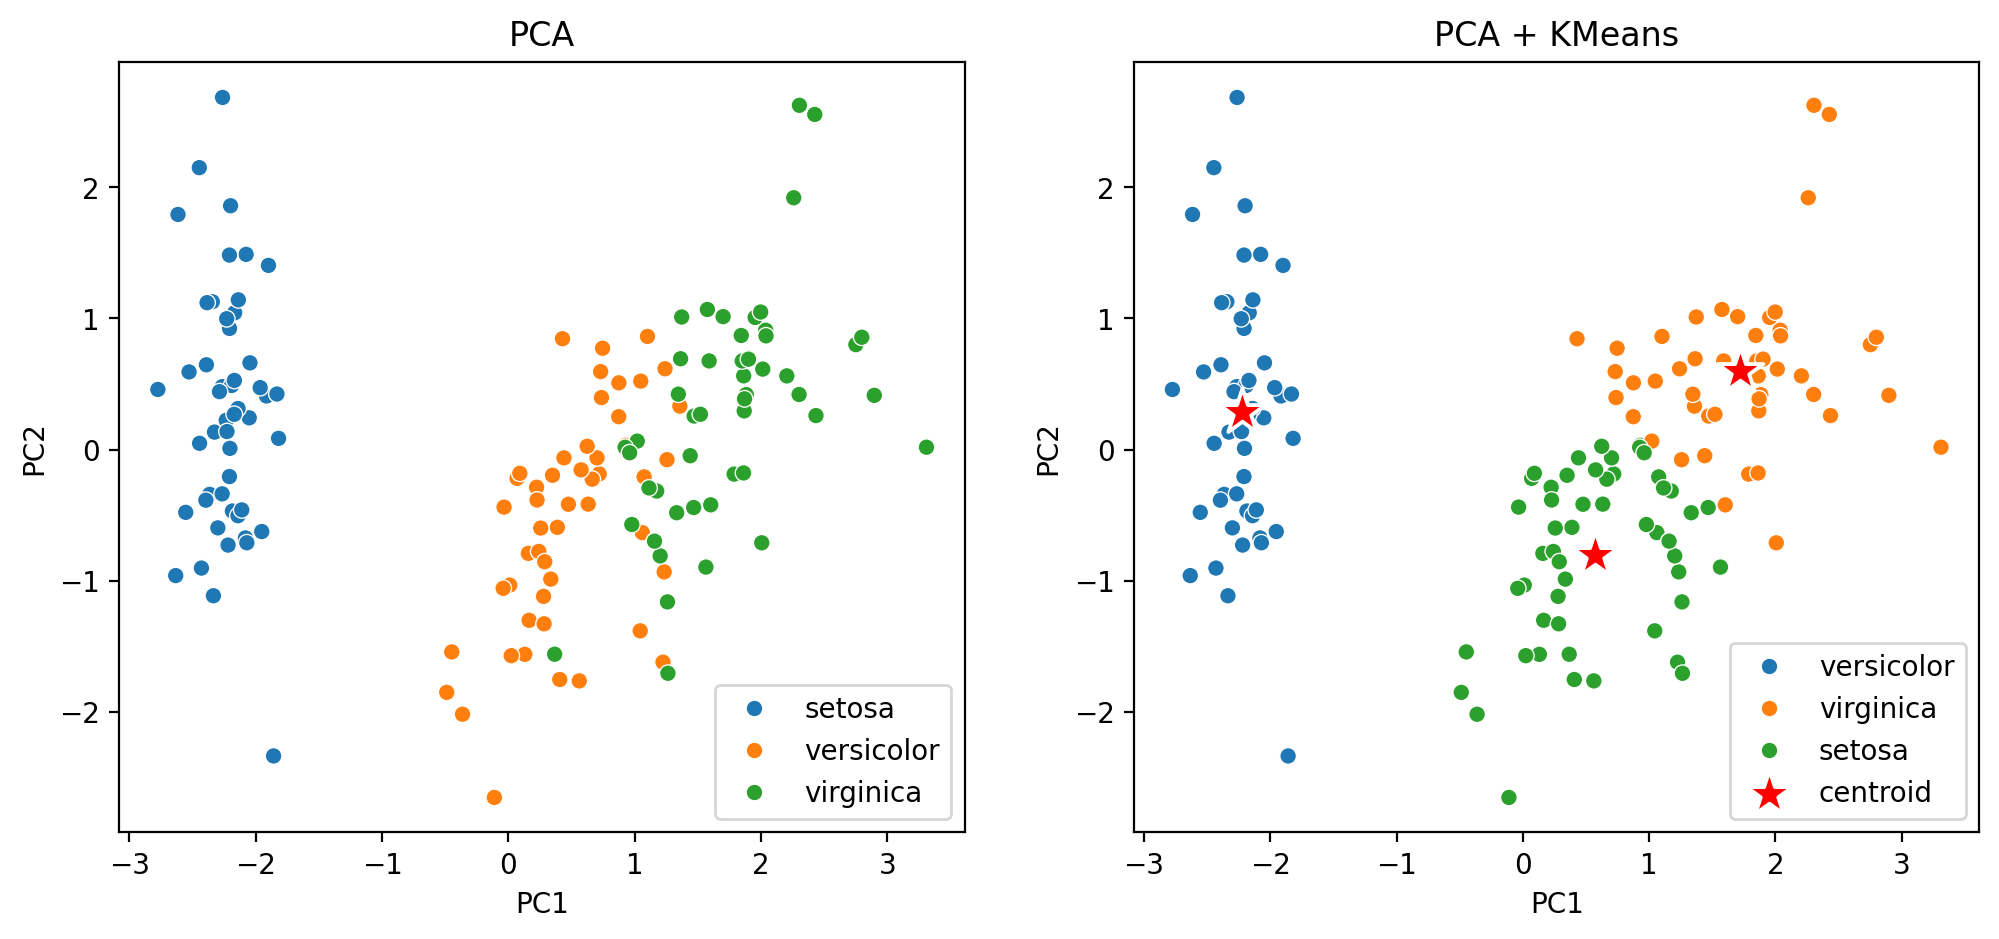

In [9]:
# Plotting PCA and PCA + KMeans
pca_kmeans_labels = np.array([iris.target_names[val] for val in kmeans.labels_])

fig, ax = plt.subplots(1, 2, figsize=[12,5])

#PCA
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=species, palette='tab10', ax=ax[0])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PCA')

#PCA + KMEANS
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=pca_kmeans_labels, palette='tab10', ax=ax[1])
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red',marker='*', s=300, label='centroid',ax=ax[1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA + KMeans')

plt.show()

### Silhouette Score

is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1:

* **1:** Means clusters are well apart from each other and clearly distinguished.
* **0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* **-1:** Means clusters are assigned in the wrong way.

In [10]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    iriskmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = iriskmeans.labels_
    sc = silhouette_score(X, labels, metric='euclidean')
    print(k, round(sc,3))

2 0.582
3 0.46
4 0.385
5 0.346
6 0.322
7 0.328


## DBSCAN

**DBSCAN** stands for _Density-based Spatial Clustering of Applications with Noise_. 

* Unsupervised clustering algorithm
* Uses density to gather points in space to form clusters 
* Detects automatically the number of clusters based on your input data and parameters
* Can handle noise and outliers
  
<br>
<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/inkh3h3snoa5q6mh0ic2.png' width="700" style="float:center" />

<br>

### The DBSCAN algorithm uses two major parameters:

* **minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense i.e. the minimum number of data points that can form a cluster
* **eps (ε):** Maximum radius of the neighborhood.

The algorithm takes care of two concepts:

* **Density Reachability:** a point to be reachable from another if it lies within a particular distance (eps) from it, which indicates how densely reachable a cluster is.
* **Density Connectivity:** refers to the idea that points are connected if they are density-reachable from each other.

<br>
<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/nddkjdbqmawal7zjt7ox.png' width="500" style="float:center" />
<br>

- **Core point:** any point with a neighbor count greater than or equal to MinPts
- **Border point:** a point with a neighbor count lower than MinPts, but thant belongs to the ϵ
- **Outlier:** is neither a core nor a border point

<br>
<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/cfmvzbj9gna6fynp6w0g.gif' width="300" style="float:center" />
<br>

In [11]:
from sklearn.cluster import DBSCAN

In [13]:
db = DBSCAN(eps=0.5, min_samples=5)
dbscan = db.fit(X)

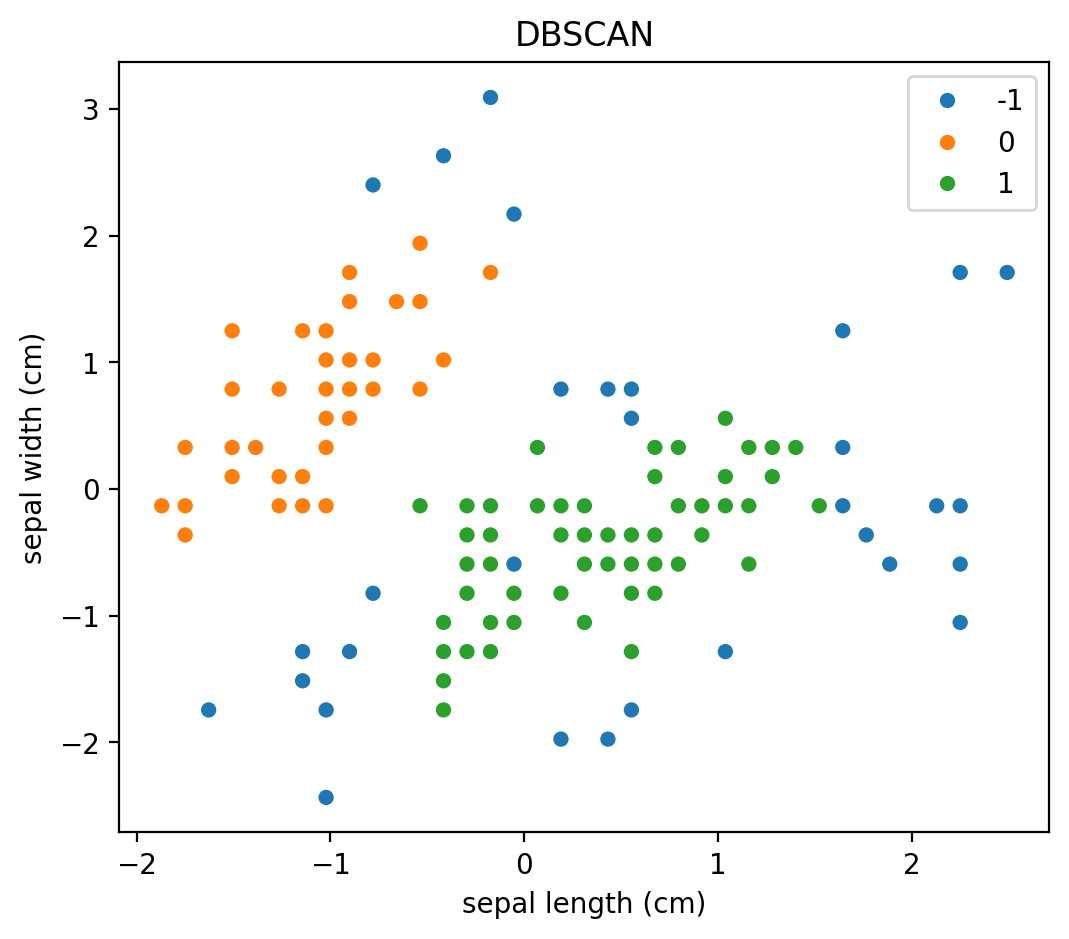

In [14]:
#dbscan_labels = np.array([iris.target_names[val] for val in dbscan.labels_])
fig, ax = plt.subplots(1,1 ,figsize=[6,5])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan.labels_, palette='tab10', ax=ax, legend=True)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title('DBSCAN')
plt.show()

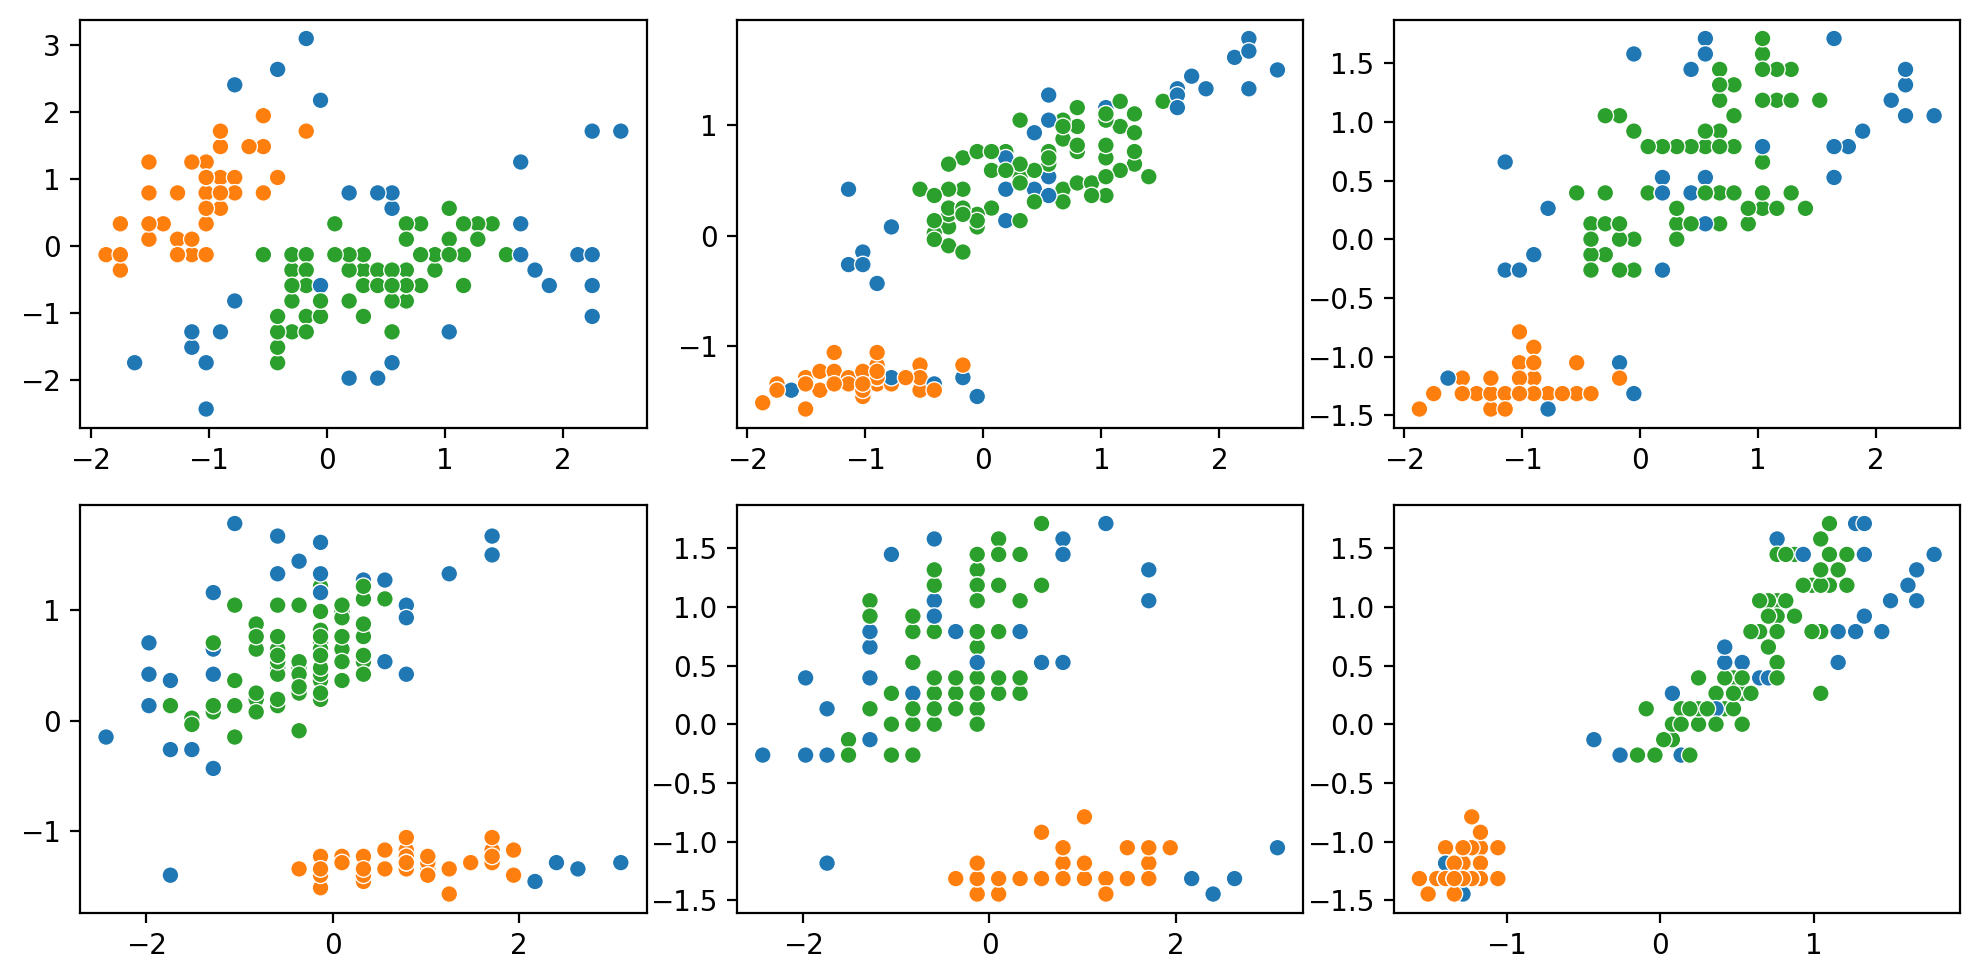

In [15]:

fig, ax = plt.subplots(2,3, figsize=[10,5])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan.labels_, palette='tab10', ax=ax[0][0], legend=False)

sns.scatterplot(x=X[:,0], y=X[:,2], hue=dbscan.labels_, palette='tab10', ax=ax[0][1], legend=False)

sns.scatterplot(x=X[:,0], y=X[:,3], hue=dbscan.labels_, palette='tab10', ax=ax[0][2], legend=False)

sns.scatterplot(x=X[:,1], y=X[:,2], hue=dbscan.labels_, palette='tab10', ax=ax[1][0], legend=False)

sns.scatterplot(x=X[:,1], y=X[:,3], hue=dbscan.labels_, palette='tab10', ax=ax[1][1], legend=False)

sns.scatterplot(x=X[:,2], y=X[:,3], hue=dbscan.labels_, palette='tab10', ax=ax[1][2], legend=False)

plt.tight_layout()
plt.show()

In [16]:
db_pca = DBSCAN(eps=0.5, min_samples=13)
dbscan_pca = db_pca.fit(pca_data)

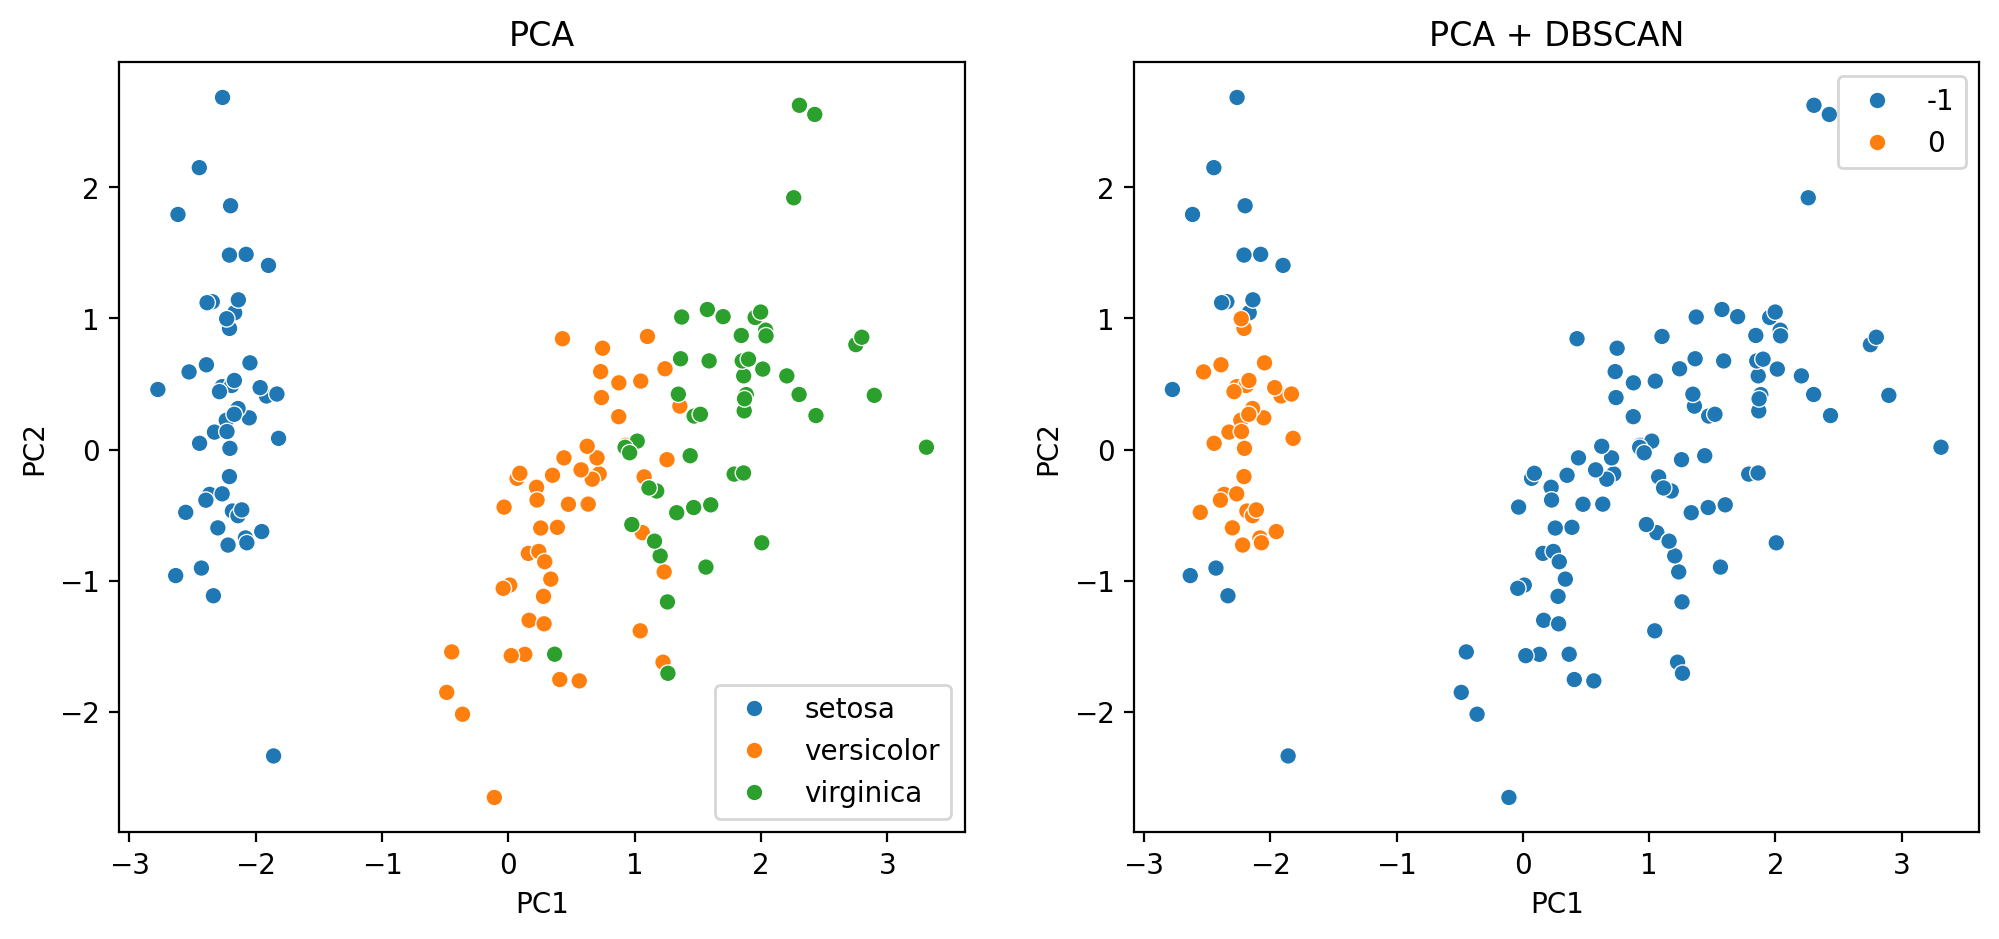

In [17]:
# Plotting PCA and PCA + KMeans
#pca_kmeans_labels = np.array([iris.target_names[val] for val in kmeans.labels_])

fig, ax = plt.subplots(1, 2, figsize=[12,5])

#PCA
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=species, palette='tab10', ax=ax[0])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('PCA')

#PCA + KMEANS
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_pca.labels_, palette='tab10', ax=ax[1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA + DBSCAN')

plt.show()

K-means clustering does better with the iris data, because it allows us to specify the number of clusters. Where DBSCAN really excels is with irregularly-shaped clusters (even very irregularly-shaped) that are well-separated.

In [19]:
for minpt in range(2,12):
    irisdbscan = DBSCAN(min_samples = minpt).fit(X)
    core_indices = irisdbscan.core_sample_indices_
    labels = irisdbscan.labels_[core_indices]
    nclusters = len(set(labels))
    sc = silhouette_score(X[core_indices], labels, metric='euclidean')
    print(minpt, nclusters, round(sc,4), sum([1 for x in irisdbscan.labels_ if x == -1]))

2 9 0.1904 13
3 7 0.2261 17
4 2 0.6641 33
5 2 0.6723 34
6 4 0.5808 42
7 5 0.5263 46
8 3 0.7021 59
9 4 0.6708 68
10 3 0.7519 89
11 2 0.7365 102


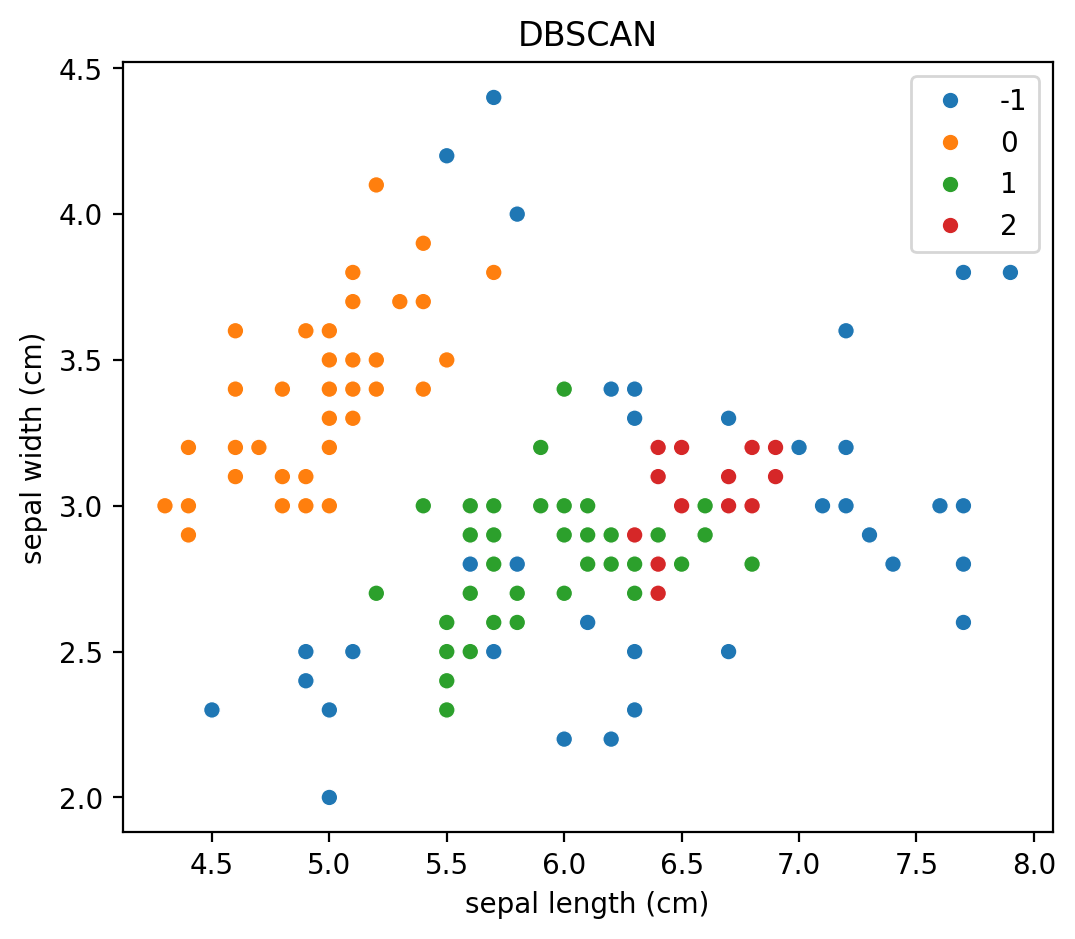

In [20]:
db = DBSCAN(min_samples=13)
dbscan = db.fit(iris.data)

#dbscan_labels = np.array([iris.target_names[val] for val in dbscan.labels_])
fig, ax = plt.subplots(1,1 ,figsize=[6,5])
sns.scatterplot(x=iris.data[:,0], y=iris.data[:,1], hue=dbscan.labels_, palette='tab10', ax=ax, legend=True)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title('DBSCAN')
plt.show()

# Distances Measures

<br>
<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612124/EDA/a1ensjlzi9zjzh58oyi8.png' width="600" style="float:center" />
<br>